<a href="https://colab.research.google.com/github/JJJuniorDev/ML-colab/blob/main/sequential_basic_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
fashion_mnist= tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
X_train, y_train= fashion_mnist[0]
X_test, y_test= fashion_mnist[1]
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [16]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8284 - loss: 0.4962 - val_accuracy: 0.8142 - val_loss: 0.5143
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8450 - loss: 0.4446 - val_accuracy: 0.8285 - val_loss: 0.4815
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8559 - loss: 0.4153 - val_accuracy: 0.8370 - val_loss: 0.4600
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8618 - loss: 0.3947 - val_accuracy: 0.8424 - val_loss: 0.4425
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8675 - loss: 0.3782 - val_accuracy: 0.8483 - val_loss: 0.4294


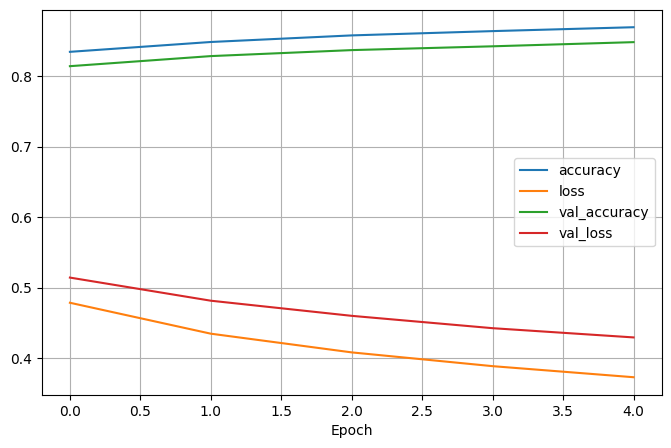

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8,5), grid=True, xlabel="Epoch")
plt.show()

In [20]:
model.history.history

{'accuracy': [0.8345500230789185,
  0.8485166430473328,
  0.857866644859314,
  0.8639500141143799,
  0.8694666624069214],
 'loss': [0.4786042273044586,
  0.4347149729728699,
  0.4081844389438629,
  0.38864511251449585,
  0.37295570969581604],
 'val_accuracy': [0.8141999840736389,
  0.828499972820282,
  0.8370000123977661,
  0.8424000144004822,
  0.8482999801635742],
 'val_loss': [0.5143030285835266,
  0.4815002381801605,
  0.46003270149230957,
  0.44251352548599243,
  0.4294220805168152]}